# Group-11
**Anisha Siwas - 025007, Tanya Goel - 025034, Aman Maheshwari - FPM21001**

**Data Description** - Dataset to predict tomorrow's rainfall using dataset available for area : Australia

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:\\Users\\Anisha Siwas\\Downloads\\11-weatherAUS.csv")

In [4]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  12/1/2008   Albury     13.4     22.9       0.6          NaN       NaN   
1  12/2/2008   Albury      7.4     25.1       0.0          NaN       NaN   
2  12/3/2008   Albury     12.9     25.7       0.0          NaN       NaN   
3  12/4/2008   Albury      9.2     28.0       0.0          NaN       NaN   
4  12/5/2008   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
#dropping evaporation and sunshine columns
df.drop(['Evaporation','Sunshine'], inplace=True, axis=1)

In [8]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  12/1/2008   Albury     13.4     22.9       0.6           W           44.0   
1  12/2/2008   Albury      7.4     25.1       0.0         WNW           44.0   
2  12/3/2008   Albury     12.9     25.7       0.0         WSW           46.0   
3  12/4/2008   Albury      9.2     28.0       0.0          NE           24.0   
4  12/5/2008   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  Humidity3pm  \
0          W        WNW          20.0  ...         71.0         22.0   
1        NNW        WSW           4.0  ...         44.0         25.0   
2          W        WSW          19.0  ...         38.0         30.0   
3         SE          E          11.0  ...         45.0         16.0   
4        ENE         NW           7.0  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No  

[5 rows x 21 columns]

In [9]:
#Creating new column
df['AverageTemp']=(df['MinTemp']+df['MaxTemp'])/2

In [10]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  12/1/2008   Albury     13.4     22.9       0.6           W           44.0   
1  12/2/2008   Albury      7.4     25.1       0.0         WNW           44.0   
2  12/3/2008   Albury     12.9     25.7       0.0         WSW           46.0   
3  12/4/2008   Albury      9.2     28.0       0.0          NE           24.0   
4  12/5/2008   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  Pressure9am  \
0          W        WNW          20.0  ...         22.0       1007.7   
1        NNW        WSW           4.0  ...         25.0       1010.6   
2          W        WSW          19.0  ...         30.0       1007.6   
3         SE          E          11.0  ...         16.0       1017.6   
4        ENE         NW           7.0  ...         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       NaN     16.9     21.8         No            No   
1       1007.8       NaN       NaN     17.2     24.3         No            No   
2       1008.7       NaN       2.0     21.0     23.2         No            No   
3       1012.8       NaN       NaN     18.1     26.5         No            No   
4       1006.0       7.0       8.0     17.8     29.7         No            No   

  AverageTemp  
0       18.15  
1       16.25  
2       19.30  
3       18.60  
4       24.90  

[5 rows x 22 columns]

In [11]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
145455  6/21/2017    Uluru      2.8     23.4       0.0           E   
145456  6/22/2017    Uluru      3.6     25.3       0.0         NNW   
145457  6/23/2017    Uluru      5.4     26.9       0.0           N   
145458  6/24/2017    Uluru      7.8     27.0       0.0          SE   
145459  6/25/2017    Uluru     14.9      NaN       0.0         NaN   

        WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
145455           31.0         SE        ENE          13.0  ...         24.0   
145456           22.0         SE          N          13.0  ...         21.0   
145457           37.0         SE        WNW           9.0  ...         24.0   
145458           28.0        SSE          N          13.0  ...         24.0   
145459            NaN        ESE        ESE          17.0  ...         36.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
145455       1024.6       1020.3       NaN       NaN     10.1     22.4   
145456       1023.5       1019.1       NaN       NaN     10.9     24.5   
145457       1021.0       1016.8       NaN       NaN     12.5     26.1   
145458       1019.4       1016.5       3.0       2.0     15.1     26.0   
145459       1020.2       1017.9       8.0       8.0     15.0     20.9   

        RainToday  RainTomorrow AverageTemp  
145455         No            No       13.10  
145456         No            No       14.45  
145457         No            No       16.15  
145458         No            No       17.40  
145459         No           NaN         NaN  

[5 rows x 22 columns]

In [12]:
df.describe()

MinTemp        MaxTemp       Rainfall  WindGustSpeed  \
count  143975.000000  144199.000000  142199.000000  135197.000000   
mean       12.194034      23.221348       2.360918      40.035230   
std         6.398495       7.119049       8.478060      13.607062   
min        -8.500000      -4.800000       0.000000       6.000000   
25%         7.600000      17.900000       0.000000      31.000000   
50%        12.000000      22.600000       0.000000      39.000000   
75%        16.900000      28.200000       0.800000      48.000000   
max        33.900000      48.100000     371.000000     135.000000   

        WindSpeed9am   WindSpeed3pm    Humidity9am    Humidity3pm  \
count  143693.000000  142398.000000  142806.000000  140953.000000   
mean       14.043426      18.662657      68.880831      51.539116   
std         8.915375       8.809800      19.029164      20.795902   
min         0.000000       0.000000       0.000000       0.000000   
25%         7.000000      13.000000      57.000000      37.000000   
50%        13.000000      19.000000      70.000000      52.000000   
75%        19.000000      24.000000      83.000000      66.000000   
max       130.000000      87.000000     100.000000     100.000000   

        Pressure9am    Pressure3pm      Cloud9am      Cloud3pm        Temp9am  \
count  130395.00000  130432.000000  89572.000000  86102.000000  143693.000000   
mean     1017.64994    1015.255889      4.447461      4.509930      16.990631   
std         7.10653       7.037414      2.887159      2.720357       6.488753   
min       980.50000     977.100000      0.000000      0.000000      -7.200000   
25%      1012.90000    1010.400000      1.000000      2.000000      12.300000   
50%      1017.60000    1015.200000      5.000000      5.000000      16.700000   
75%      1022.40000    1020.000000      7.000000      7.000000      21.600000   
max      1041.00000    1039.600000      9.000000      9.000000      40.200000   

            Temp3pm    AverageTemp  
count  141851.00000  143579.000000  
mean       21.68339      17.706666  
std         6.93665       6.296784  
min        -5.40000      -6.150000  
25%        16.60000      13.000000  
50%        21.10000      17.350000  
75%        26.40000      22.300000  
max        46.70000      38.800000

In [13]:
df.groupby("Location")['MinTemp','MaxTemp','Rainfall'].mean().reset_index()

<ipython-input-13-392b18bb9981>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Location")['MinTemp','MaxTemp','Rainfall'].mean().reset_index()


Location    MinTemp    MaxTemp  Rainfall
0           Adelaide  12.579505  22.898934  1.566354
1             Albany  12.948438  20.070998  2.263859
2             Albury   9.530604  22.640872  1.914115
3       AliceSprings  13.142284  29.248420  0.882850
4      BadgerysCreek  11.131719  24.031208  2.193101
5           Ballarat   7.367950  18.287266  1.740026
6            Bendigo   8.593713  21.621746  1.619380
7           Brisbane  16.423807  26.448380  3.144891
8             Cairns  21.220467  29.558849  5.742035
9           Canberra   6.821866  20.976639  1.741720
10             Cobar  13.149451  25.870093  1.127309
11      CoffsHarbour  14.437108  23.965385  5.061497
12          Dartmoor   8.620034  19.697454  2.146567
13            Darwin  23.209305  32.540977  5.092452
14         GoldCoast  17.363286  25.767062  3.769396
15            Hobart   9.078578  17.865727  1.601819
16         Katherine  20.553564  34.935436  3.201090
17        Launceston   7.836190  18.954911  2.011988
18         Melbourne  11.779174  20.769358  1.870062
19  MelbourneAirport   9.973945  20.491858  1.451977
20           Mildura  10.731572  24.840944  0.945062
21             Moree  12.905853  26.950548  1.630203
22      MountGambier   8.825477  19.828995  2.087562
23       MountGinini   3.577280  11.663676  3.292260
24         Newcastle  13.760007  24.101070  3.183892
25              Nhil   8.999809  22.405153  0.934863
26         NorahHead  15.355481  22.588937  3.387299
27     NorfolkIsland  16.871875  21.830253  3.127665
28         Nuriootpa   9.363242  21.704133  1.390343
29        PearceRAAF  12.303850  26.051238  1.669080
30           Penrith  12.577449  24.764366  2.175304
31             Perth  12.922706  25.034837  1.906295
32      PerthAirport  12.580359  25.533234  1.761648
33          Portland   9.586867  18.055053  2.530374
34          Richmond  11.364202  24.458664  2.138462
35              Sale   8.567420  20.282281  1.510167
36        SalmonGums   9.313007  24.250827  1.034382
37            Sydney  14.866826  23.001975  3.324543
38     SydneyAirport  14.901729  23.383915  3.009917
39        Townsville  20.417874  29.367160  3.485592
40       Tuggeranong   7.242133  20.767545  2.164043
41             Uluru  14.466688  30.383195  0.784363
42        WaggaWagga   9.617182  23.031871  1.709946
43           Walpole  11.806631  20.459184  2.906846
44          Watsonia  10.131879  20.896078  1.860820
45       Williamtown  12.780180  24.001065  3.591108
46       Witchcliffe  10.775067  21.686247  2.895664
47        Wollongong  14.939471  21.468174  3.594903
48           Woomera  13.363727  26.596707  0.490405

In [14]:
df[df['AverageTemp']>30][['Location','AverageTemp']]

Location  AverageTemp
44       Albury        30.20
58       Albury        30.55
59       Albury        31.65
60       Albury        32.60
61       Albury        32.35
...         ...          ...
145365    Uluru        32.70
145366    Uluru        31.55
145367    Uluru        30.95
145369    Uluru        31.45
145370    Uluru        30.55

[3219 rows x 2 columns]

In [15]:
df[df['AverageTemp']<0][['Location','AverageTemp']]

Location  AverageTemp
49216  Tuggeranong        -0.25
52208  MountGinini        -2.35
52209  MountGinini        -1.60
52210  MountGinini        -1.40
52211  MountGinini        -1.30
...            ...          ...
55074  MountGinini        -2.70
55075  MountGinini        -1.90
55076  MountGinini        -0.90
55082  MountGinini        -0.05
55101  MountGinini        -1.70

[308 rows x 2 columns]

In [16]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [17]:
df['Date']=pd.to_datetime(df["Date"],format='%m/%d/%Y')

In [18]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
AverageTemp             float64
dtype: object

In [19]:
pd.crosstab(df.Location,df.Rainfall)

Rainfall          0.0    0.1    0.2    0.3    0.4    0.5    0.6    0.7    \
Location                                                                   
Adelaide           2030      0    142      0     87      0     55      0   
Albany             1667      8    133      7     90      9     73      1   
Albury             2015      0    199      0     70      0     40      0   
AliceSprings       2665      0     42      1     29      0     21      0   
BadgerysCreek      1939      0    240      0     58      0     32      0   
Ballarat           1664      0    280      0    112      0     62      0   
Bendigo            1947      0    324      0     82      0     41      0   
Brisbane           2033      0    217      0     86      0     54      0   
Cairns             1638      0    134      0    107      0     71      0   
Canberra           2421      2    187      0     58      0     58      0   
Cobar              2382      0    102      0     37      0     34      0   
CoffsHarbour       1740     27    101     10     70      6     49      3   
Dartmoor           1371      0    299      0    122      0    100      0   
Darwin             2147      0     61      0     56      0     33      0   
GoldCoast          1838      0    171      0     65      0     58      0   
Hobart             1774      0    287      0    134      0     88      0   
Katherine          1229      3      9      0     14      1     16      0   
Launceston         1925     29    146     15     65      6     47      2   
Melbourne          1454      0    131      0     87      0     63      0   
MelbourneAirport   1877      0    185      0    102      0     80      0   
Mildura            2424      2    101      2     64      0     24      0   
Moree              2267      0     78      0     44      0     31      0   
MountGambier       1437      0    318      0    128      0     87      0   
MountGinini        1614      0    244      0     90      0     59      0   
Newcastle          1823     41    145      1     64      8     45      3   
Nhil               1052      0    154      0     51      0     30      0   
NorahHead          1707      0    215      0     73      0     50      0   
NorfolkIsland      1402      1    225      5    152      0    107      0   
Nuriootpa          1943     39    158     20     92      7     63      3   
PearceRAAF         2068      3     71      1     38      1     27      0   
Penrith            1831      0    361      0     67      0     52      0   
Perth              2293      0    108      0     53      0     37      0   
PerthAirport       2235      0     65      0     51      0     38      0   
Portland           1166      0    363      0    148      0     88      0   
Richmond           1911      0    289      0     68      0     54      0   
Sale               1694      0    355      1    132      0     66      0   
SalmonGums         2033      0    212      0    103      0     63      0   
Sydney             2026      0    216      0     95      0     57      0   
SydneyAirport      1924      0    123      0     70      0     48      0   
Townsville         2232      0    105      0     69      0     50      0   
Tuggeranong        2149      0    133      0     53      0     44      0   
Uluru              1324      0     40      0     22      0      7      0   
WaggaWagga         2153      0    100      0     66      0     51      0   
Walpole            1371      0    231      0     82      0     87      0   
Watsonia           1642      0    305      0    109      0     79      0   
Williamtown        1563      0    126      0     56      0     39      1   
Witchcliffe        1509      0    312      0     88      0     62      0   
Wollongong         1928      0    127      0     84      0     53      0   
Woomera            2603      2     91      2     39      1     19      0   

Rainfall          0.8    0.9    ...  216.3  219.6  225.0  236.8  240.0  247.2  \
Location                        ...       

<AxesSubplot:xlabel='Location', ylabel='MinTemp'>

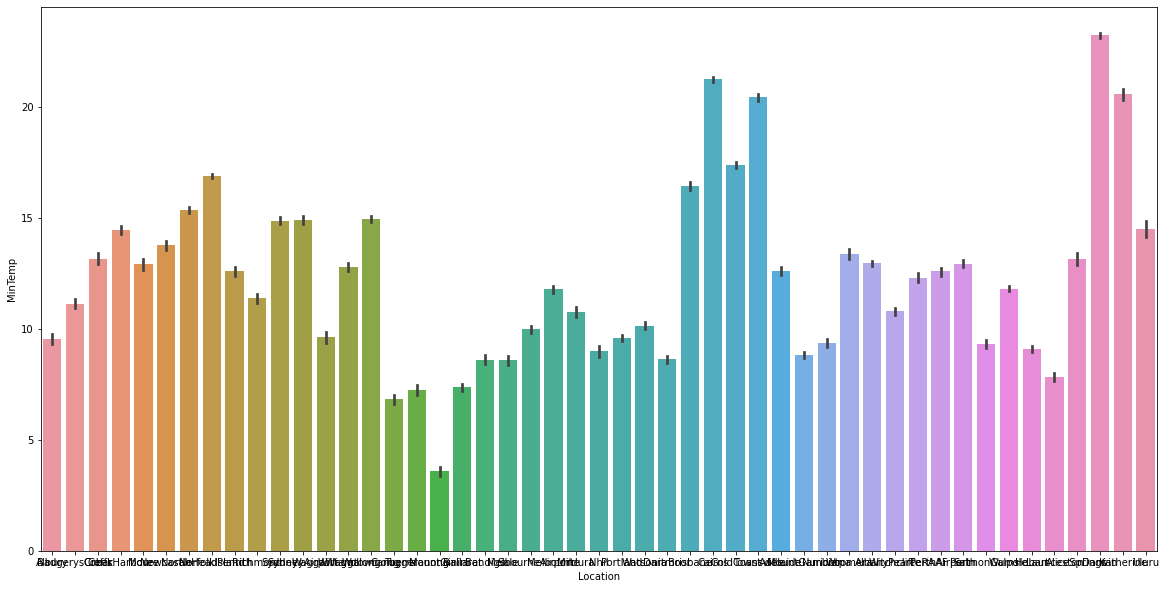

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(x='Location', y='MinTemp', data=df)

<AxesSubplot:xlabel='Location', ylabel='MaxTemp'>

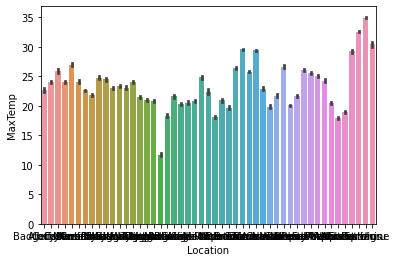

In [21]:
sns.barplot(x='Location', y='MaxTemp', data=df)

<AxesSubplot:xlabel='Location', ylabel='AverageTemp'>

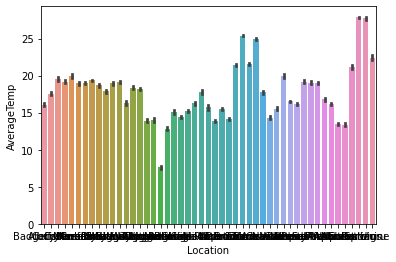

In [22]:
sns.barplot(x='Location', y='AverageTemp', data=df)

<AxesSubplot:xlabel='WindGustDir', ylabel='Rainfall'>

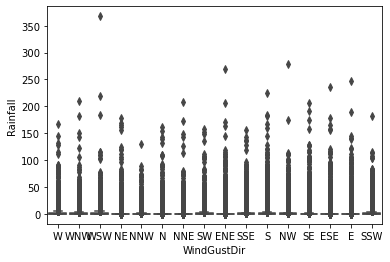

In [23]:
sns.boxplot(x='WindGustDir', y='Rainfall', data=df)

<AxesSubplot:xlabel='RainToday', ylabel='Rainfall'>

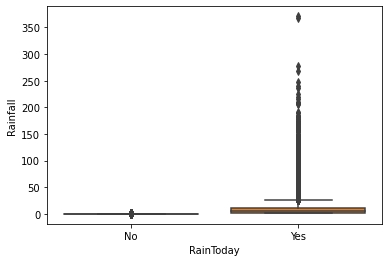

In [24]:
sns.boxplot(x='RainToday', y='Rainfall', data=df)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Rainfall'>

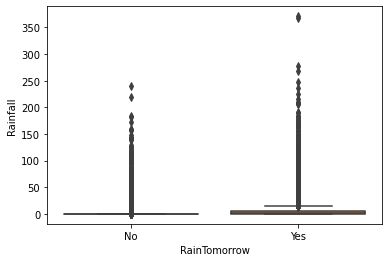

In [25]:
sns.boxplot(x='RainTomorrow', y='Rainfall', data=df)

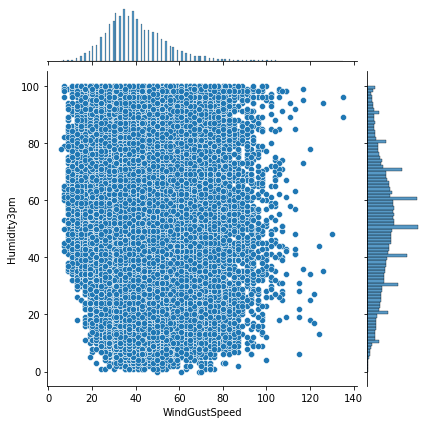

In [26]:
sns.jointplot(x='WindGustSpeed',y='Humidity3pm',data=df)

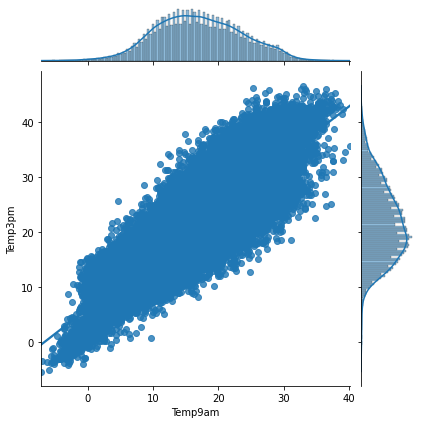

In [27]:
sns.jointplot(x='Temp9am', y='Temp3pm',data=df, kind='reg')

In [28]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0 2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1 2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2 2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3 2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4 2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  Pressure9am  \
0          W        WNW          20.0  ...         22.0       1007.7   
1        NNW        WSW           4.0  ...         25.0       1010.6   
2          W        WSW          19.0  ...         30.0       1007.6   
3         SE          E          11.0  ...         16.0       1017.6   
4        ENE         NW           7.0  ...         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       NaN     16.9     21.8         No            No   
1       1007.8       NaN       NaN     17.2     24.3         No            No   
2       1008.7       NaN       2.0     21.0     23.2         No            No   
3       1012.8       NaN       NaN     18.1     26.5         No            No   
4       1006.0       7.0       8.0     17.8     29.7         No            No   

  AverageTemp  
0       18.15  
1       16.25  
2       19.30  
3       18.60  
4       24.90  

[5 rows x 22 columns]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   WindGustDir    135134 non-null  object        
 6   WindGustSpeed  135197 non-null  float64       
 7   WindDir9am     134894 non-null  object        
 8   WindDir3pm     141232 non-null  object        
 9   WindSpeed9am   143693 non-null  float64       
 10  WindSpeed3pm   142398 non-null  float64       
 11  Humidity9am    142806 non-null  float64       
 12  Humidity3pm    140953 non-null  float64       
 13  Pressure9am    130395 non-null  float64       
 14  Pressure3pm    130432 non-null  float64       
 15  

In [30]:
# Replacing columns Rain Today & Rain Tomorrow into numeric forms 0 & 1 respectively
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
df.head()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0 2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1 2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2 2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3 2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4 2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  Pressure9am  \
0          W        WNW          20.0  ...         22.0       1007.7   
1        NNW        WSW           4.0  ...         25.0       1010.6   
2          W        WSW          19.0  ...         30.0       1007.6   
3         SE          E          11.0  ...         16.0       1017.6   
4        ENE         NW           7.0  ...         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       NaN     16.9     21.8        0.0           0.0   
1       1007.8       NaN       NaN     17.2     24.3        0.0           0.0   
2       1008.7       NaN       2.0     21.0     23.2        0.0           0.0   
3       1012.8       NaN       NaN     18.1     26.5        0.0           0.0   
4       1006.0       7.0       8.0     17.8     29.7        0.0           0.0   

   AverageTemp  
0        18.15  
1        16.25  
2        19.30  
3        18.60  
4        24.90  

[5 rows x 22 columns]

<AxesSubplot:xlabel='RainToday', ylabel='RainTomorrow'>

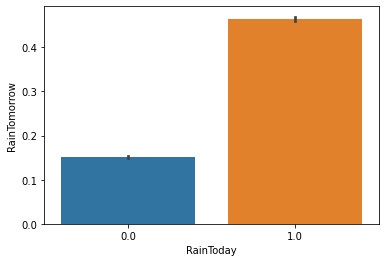

In [31]:
sns.barplot(x='RainToday',y='RainTomorrow',data=df)

<AxesSubplot:xlabel='RainToday', ylabel='MinTemp'>

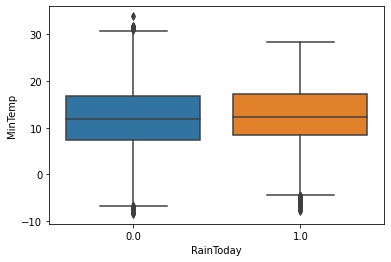

In [32]:
sns.boxplot(x='RainToday',y='MinTemp',data=df)

<AxesSubplot:xlabel='RainToday', ylabel='MaxTemp'>

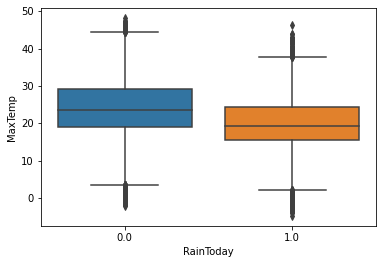

In [33]:
sns.boxplot(x='RainToday',y='MaxTemp',data=df)

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

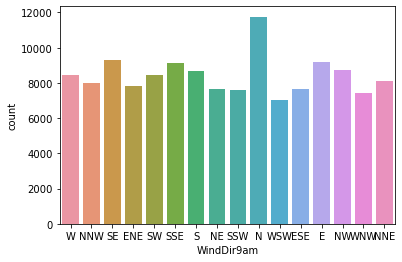

In [34]:
sns.countplot(x='WindDir9am', data=df)

<AxesSubplot:xlabel='Location', ylabel='count'>

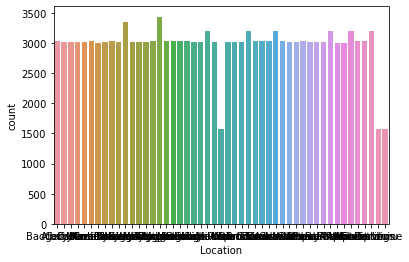

In [35]:
sns.countplot(x='Location', data=df)

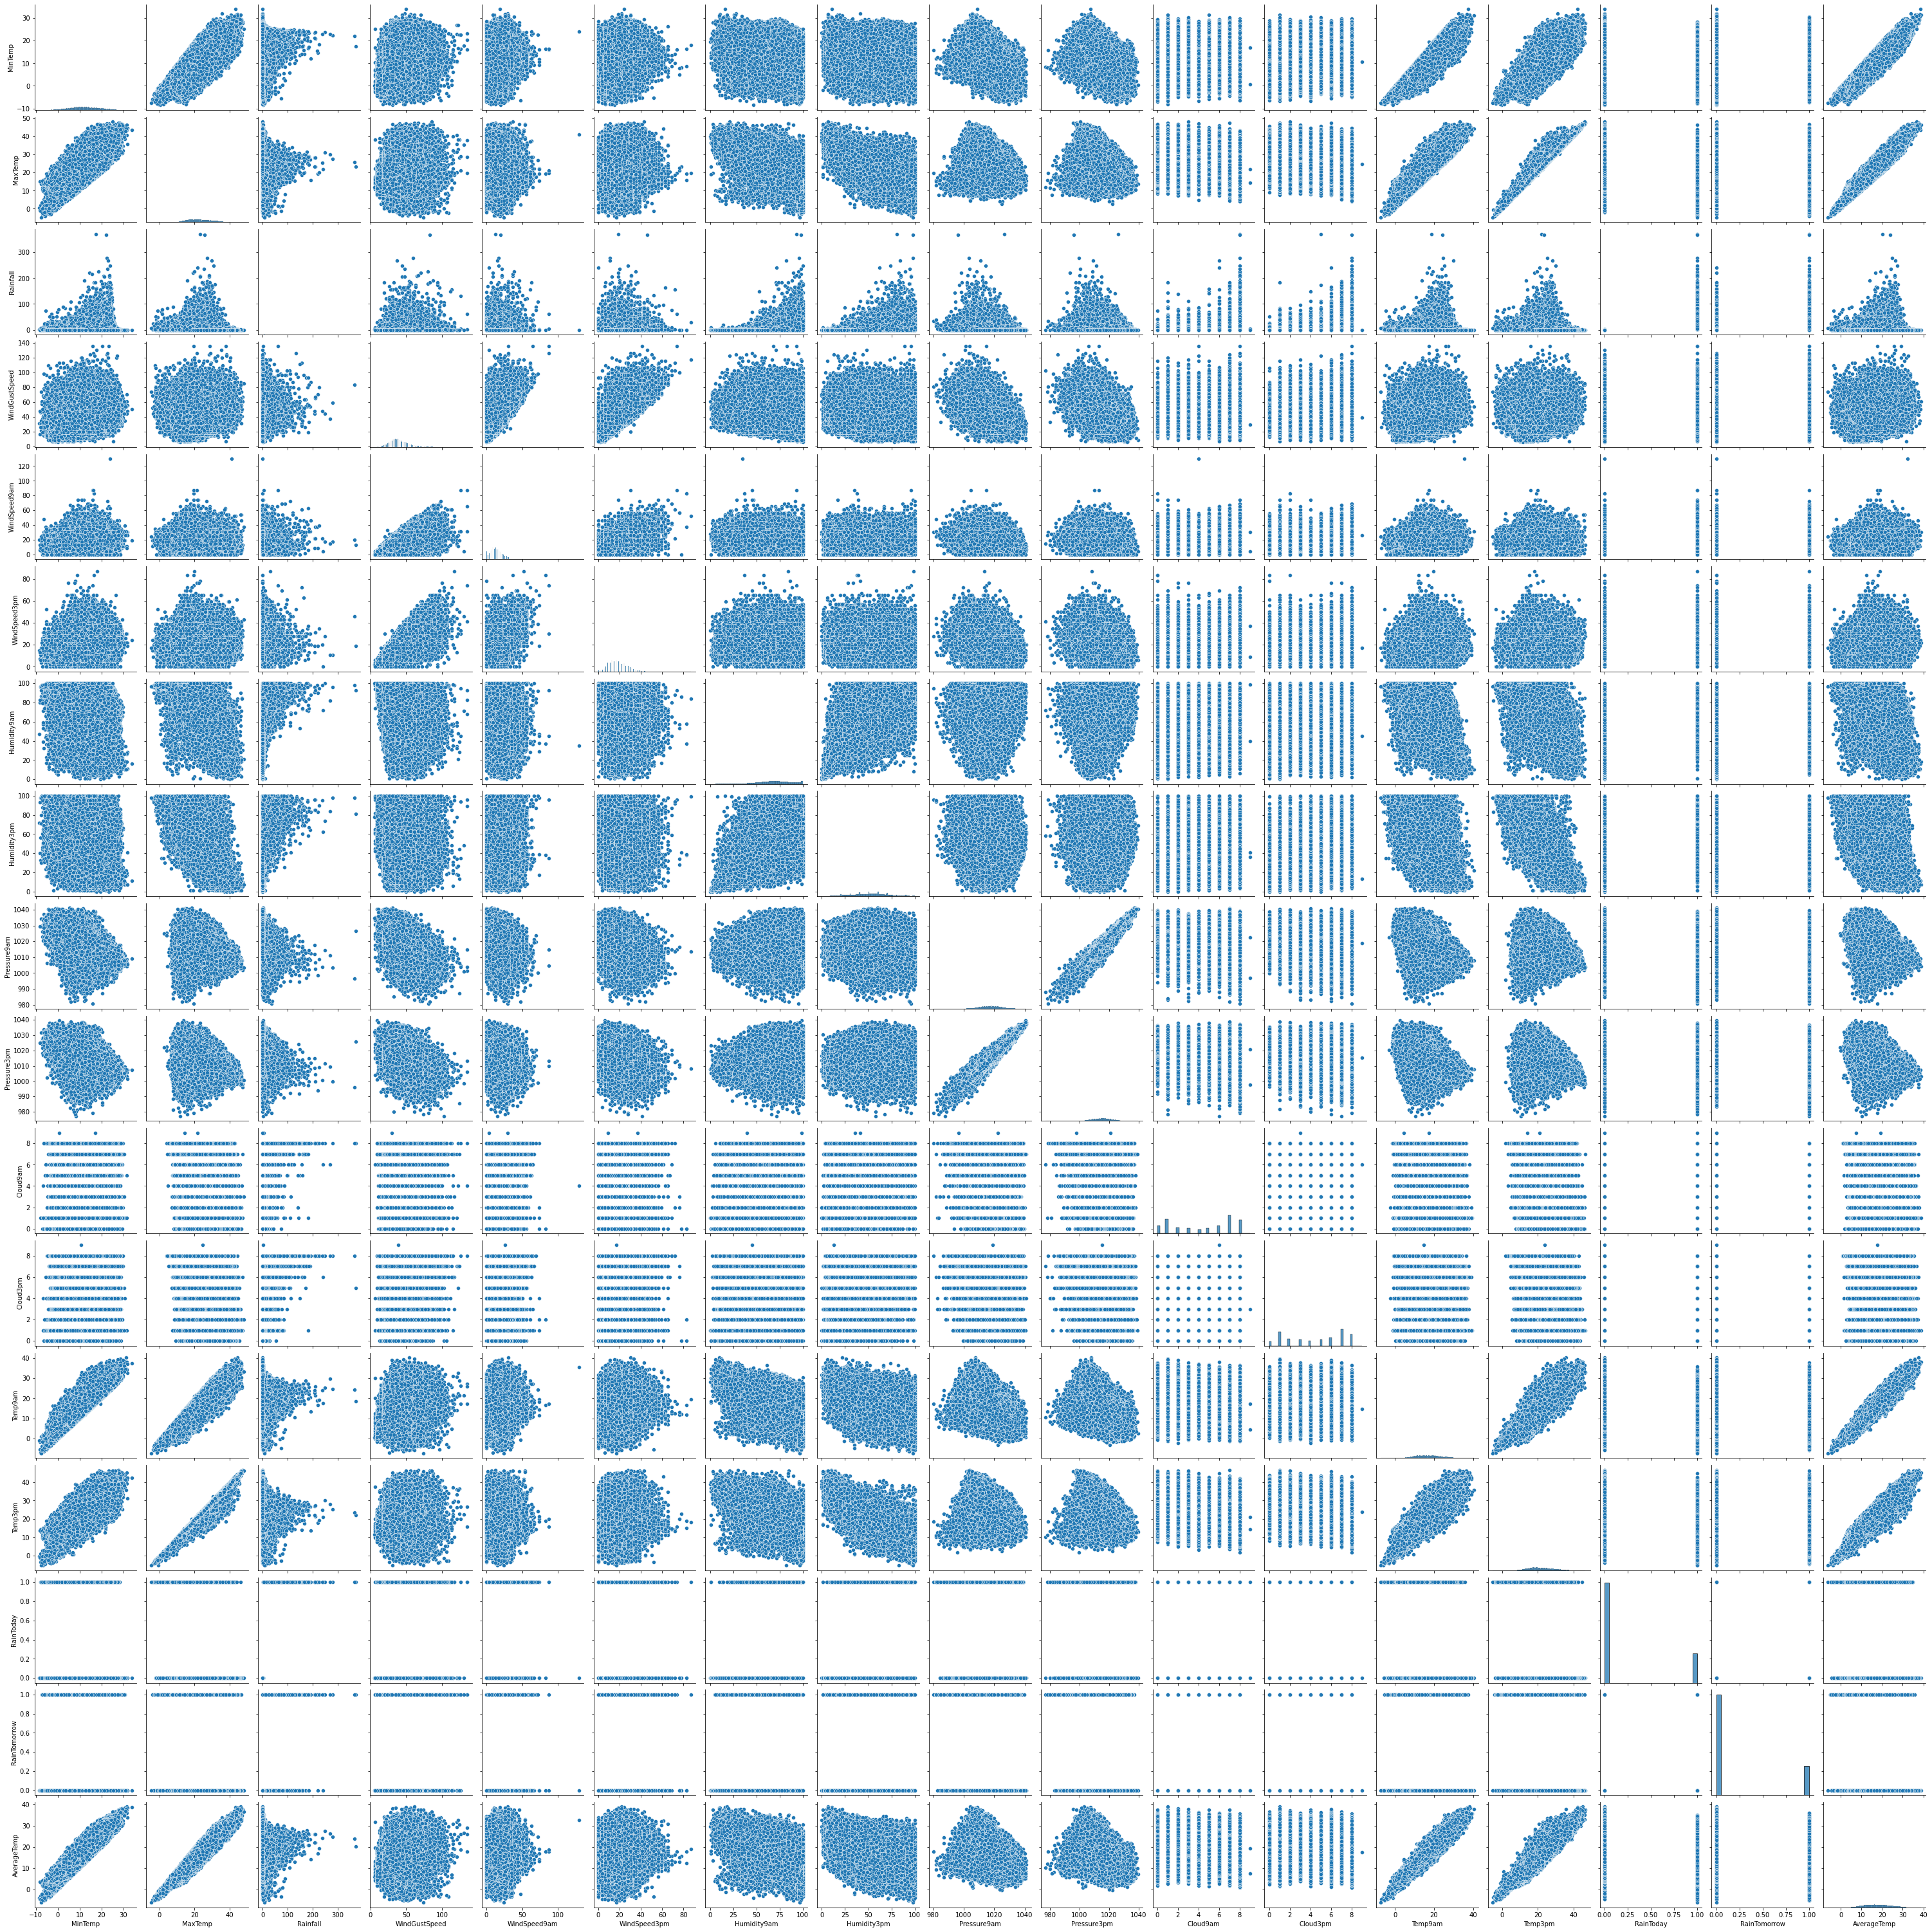

In [36]:
sns.pairplot(df)

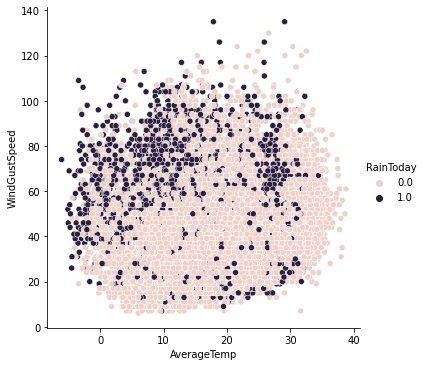

In [37]:
sns.relplot(x='AverageTemp',y='WindGustSpeed',hue='RainToday',kind='scatter',color='blue',data=df)

In [38]:
cross=pd.crosstab(df.Location,df.WindGustDir)

<AxesSubplot:xlabel='WindGustDir', ylabel='Location'>

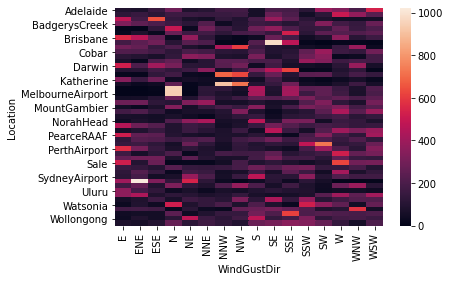

In [39]:
sns.heatmap(cross)